# Titanic Kaggle Challenge

---

1. Import packages
2. Loading data with Pandas
3. Descriptive statistics of data
4. Data visualization
5. Feature Engineering
6. Model selection
7. Hyperparameter optimization
8. Evaluation of model
9. Prediction of test.csv
10. Remarks on possible Improvements

---

## 1. Import packages

In [152]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)


---

## 2. Loading data with Pandas

Load `Train.csv` and `test.csv` into individual dataframes

In [212]:
data_train = pd.read_csv("D:\Programming\Python\Kaggle\Titanic\Train.csv")
test = pd.read_csv("D:\Programming\Python\Kaggle\Titanic\Test.csv")
train = data_train
# define dataset
y = data_train["Survived"]
PassengerId = data_train["PassengerId"]

First view at the data:
PassengerID is supposed to be the index so lets use set_index

In [154]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [155]:
train.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [156]:
train.set_index("PassengerId");

---

## 3. Descriptive statistics of data

### Data types

First lets look at the different data types present in this df:
There are numerical as well as categorial data
Also some categorial features seem to be ordinal
There are some null values in "age" and a lot of null values in "Cabin"

In [157]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Statistics

Now let's look at some statistics about the datasets:
Nothing too interesting here, data doesnt seem to be much skewed but lets look more closely into each feature

In [158]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


---

## 3. Data visualization

### Survived

This function shows the occurences of possible combinations of two categorial features

In [159]:
def Cat_Heat_Map(X, Y, Z):
    P = X[[Y, Z]]
    P1 = P.groupby(Y).sum()
    P1.loc[:,"Not Survived"] = P.groupby(Y).size() - P1[Z]
    P2 = P1["Survived"] + P1["Not Survived"]
    P2 = P1.div(P2, axis=0)
    fig, axes = plt.subplots(1, 2, figsize=(18, 10))
    sns.heatmap(P2, annot=True, cmap="Blues", fmt='g', ax =axes[0])
    axes[0].set_title(f"Portion of combinations of the featrures {Y} and {Z} related to {Y}")
    sns.heatmap(P1, annot=True, cmap="Blues", fmt='g', ax =axes[1])
    axes[1].set_title(f"Quantity of combinations of the featrures {Y} and {Z}")
    return

Around 38 % of the people on the titanic survived

0    0.616162
1    0.383838
Name: Survived, dtype: float64
<class 'pandas.core.series.Series'>


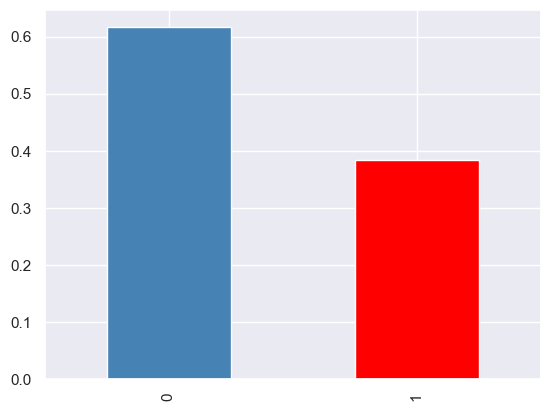

In [160]:
Survived = train.Survived.value_counts()
Survived = Survived / Survived.sum()
pd.DataFrame(Survived)
print(Survived)



Survived.plot(kind='bar', stacked=True, color=['steelblue', 'red'])
print(type(Survived))

### Pclass

Pclass describes the Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd
Between the Pclasses 1 and 2 is not a lot difference but most people in Pclass 3 did not survive
Pclass is a ordinal category and does not need any preprocessing

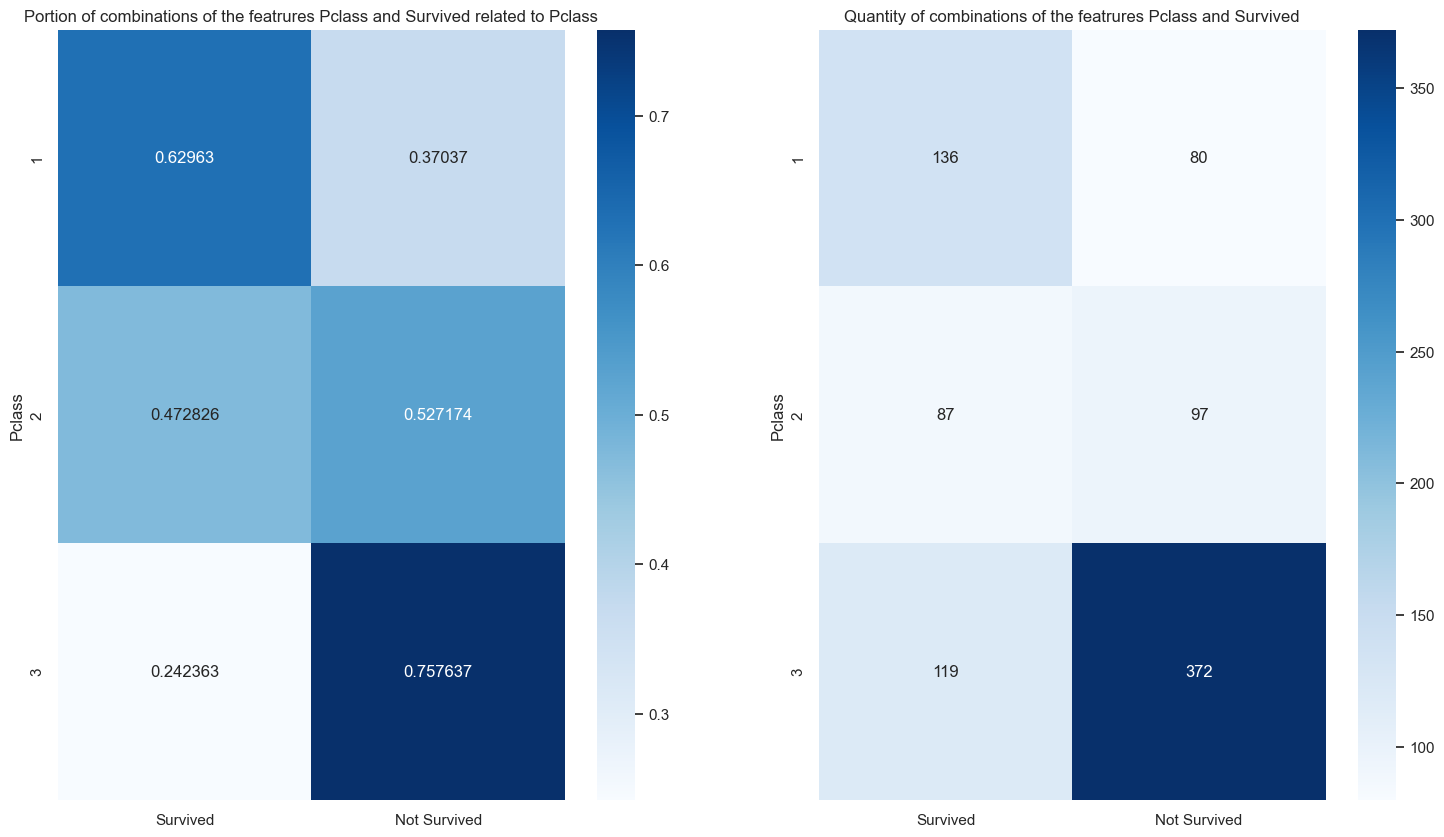

In [161]:
Cat_Heat_Map(train, "Pclass", "Survived")

### Name

Name is a difficult feature but ther could be some information in the number of names (under the assumption that people with longer names have a higher rate of survivalibility)
Also Miss vs. Mrs is showing different marriage status (only for women)
There are also other abbreveations like rev. or Master.

In [162]:
train.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

### Sex

It is obvously that women had a lot higher chance to survive the titanic 
The Sex will be needed to be encoded to 0 and 1

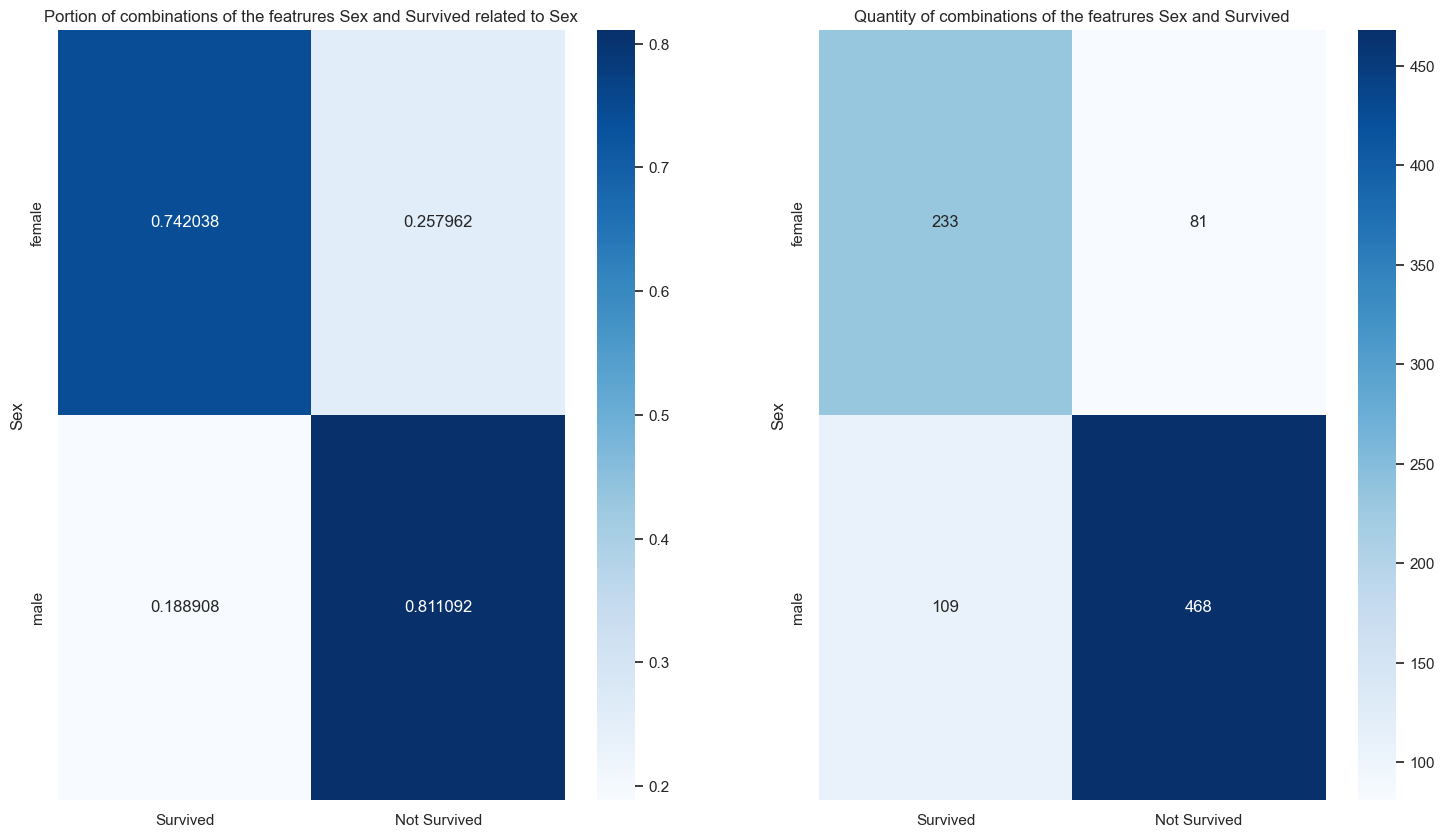

In [163]:
Cat_Heat_Map(train, "Sex", "Survived")

### Age

Younger passengers tend to have survived more often but the effect is not strong

<AxesSubplot: xlabel='Survived', ylabel='Age'>

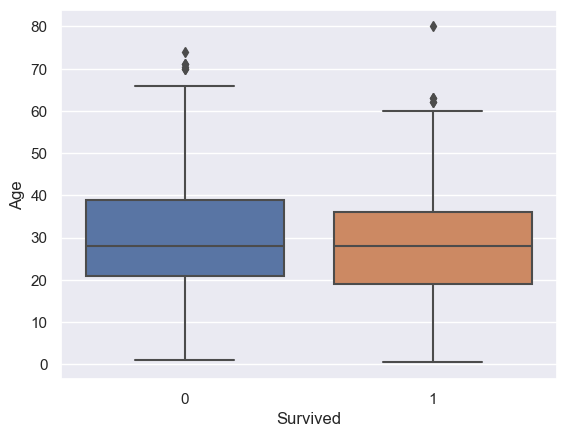

In [164]:
sns.boxplot(x = "Survived", y = "Age", data = train)

### SibSp

SibSp is the numner of siblings / spouses aboard the Titanic
Most people did not have any SibSp on board
People with a SibSp of 1 have a higher survival probability
People with a higher SibSp are likely to not survive, this is because statistically more people died that survived so there is a good chance that most of these people with a high SibSp died
Also this feature is highly skewed and has some outliers with 8 SibSp

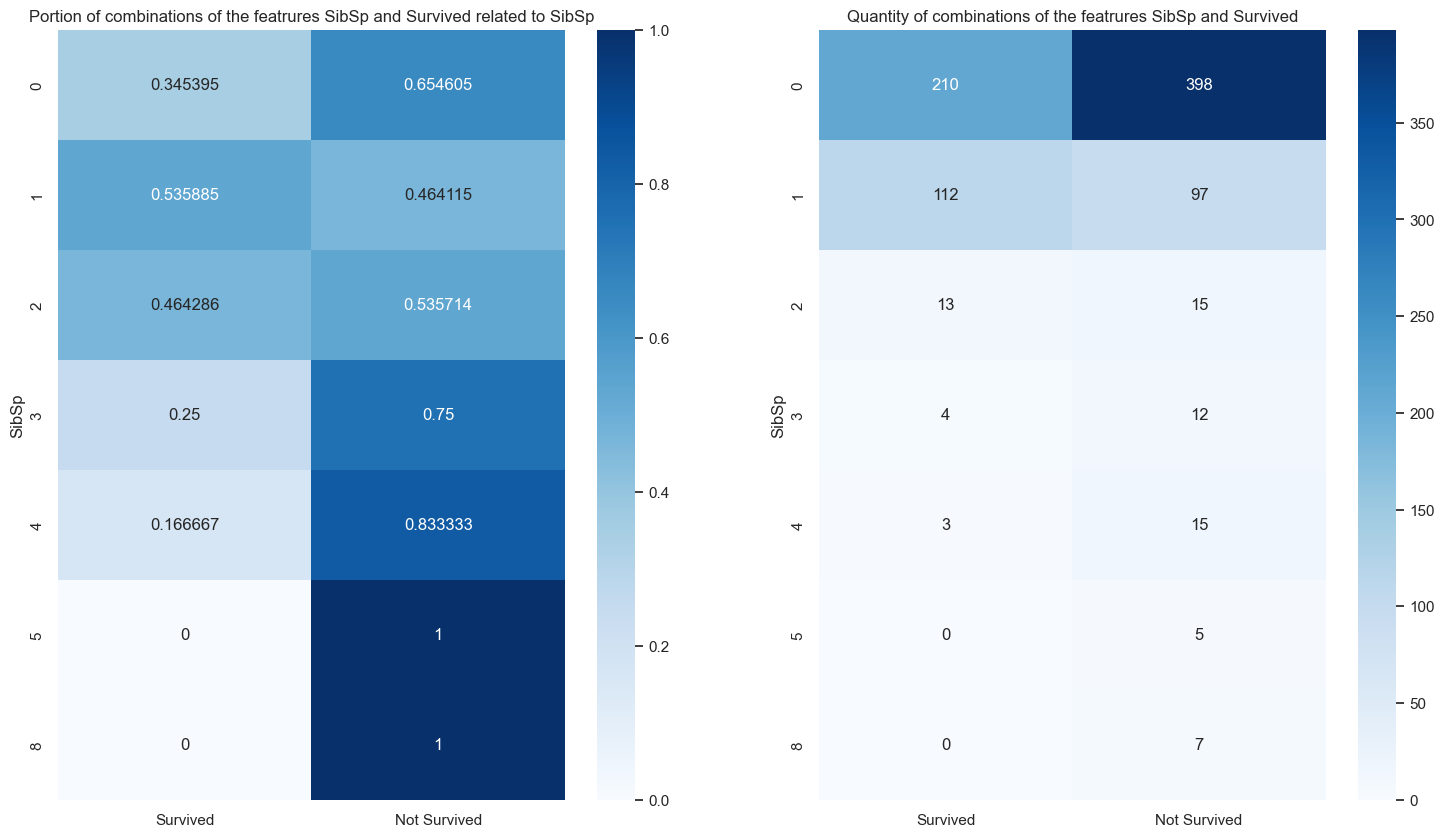

In [165]:
Cat_Heat_Map(train, "SibSp", "Survived")

### Parch

Number of parents / children aboard the Titanic
Passengers with 1 to 3 parents/children have a high chance of survival
but again there are outliers and the feature is skewed

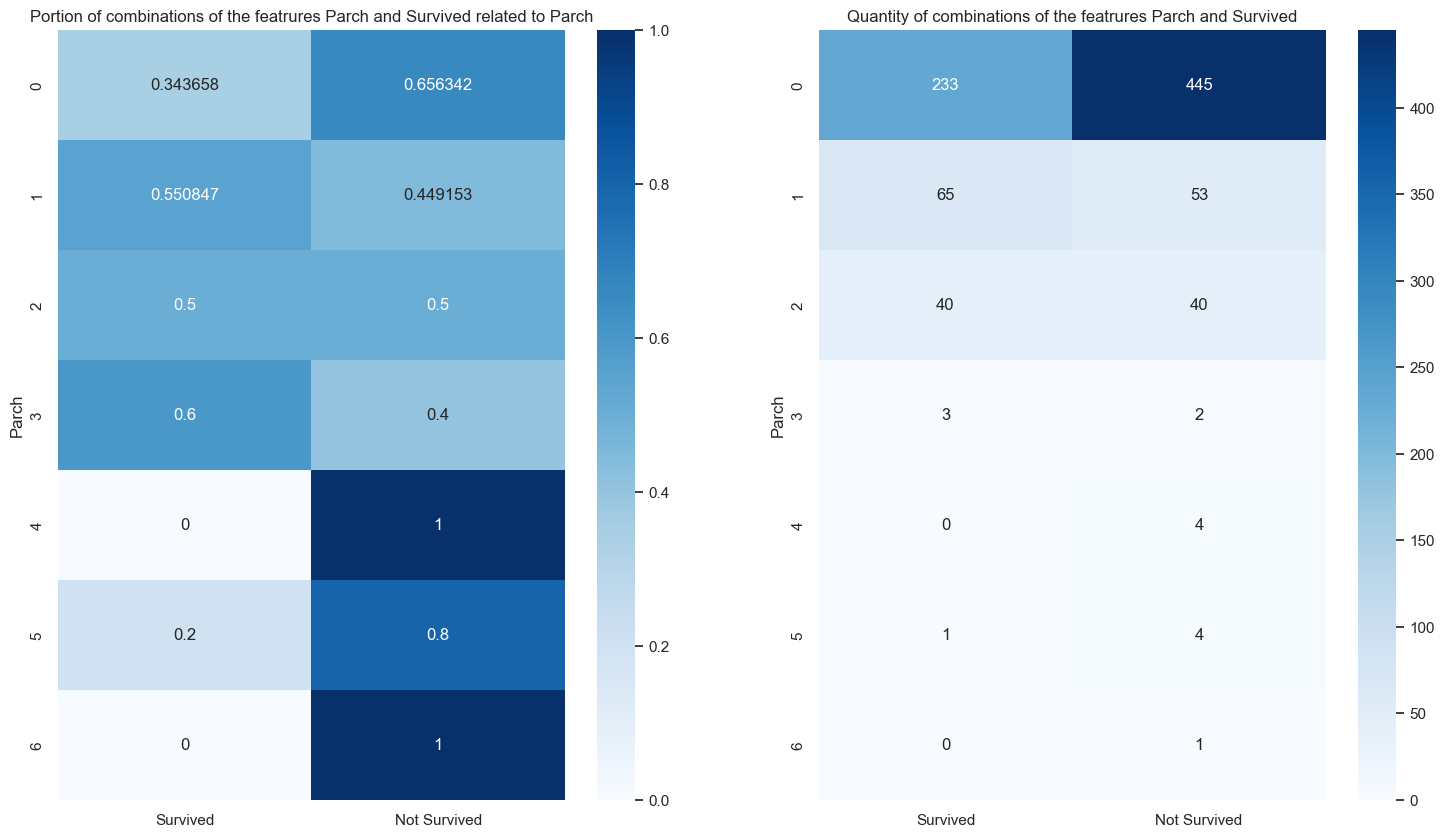

In [166]:
Cat_Heat_Map(train, "Parch", "Survived")

### Ticket

Number of the Ticket (Ticket number)
Ticket number sometimes has letters in front of it, they could be used for a category depending on how many different there are
these category might be helpful depending on what they represent
Also the actual number could be used but isnt likely to help here

In [167]:
train.Ticket.head()


0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

### Fare

This is the passenger fare
This data contains a lot of outliers
people who payed over 25 dollars appear to have a higher survival cahnce

<AxesSubplot: xlabel='Survived', ylabel='Fare'>

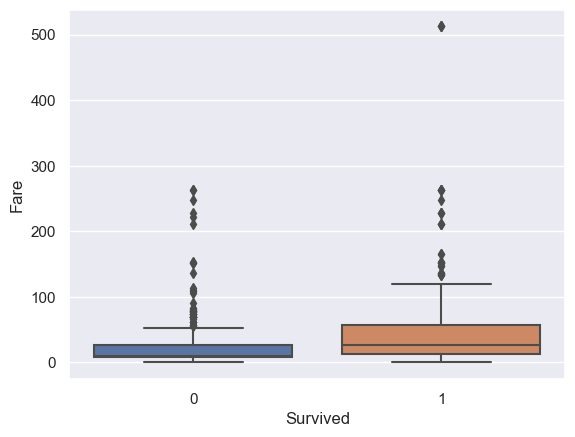

In [168]:
sns.boxplot(x = "Survived", y = "Fare", data = train)

### Cabin

The cabin number is unique for every passenger so OneHotEncoding doesnt make sense here.
Instead the Letter in front of the cabin could be encoded
Also the room number and number of rooms that the passenger has can be used
Lastly most of the passengers doesnt even have a room or the room number is unknown, this should also be encoded and i will focus on that in the following visualization

In [169]:
print(train.Cabin.value_counts())
train.Cabin.info()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64
<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Cabin
Non-Null Count  Dtype 
--------------  ----- 
204 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


diveding the passengers with and without a cabin shows that passengers with a cabin are way more likely to survive

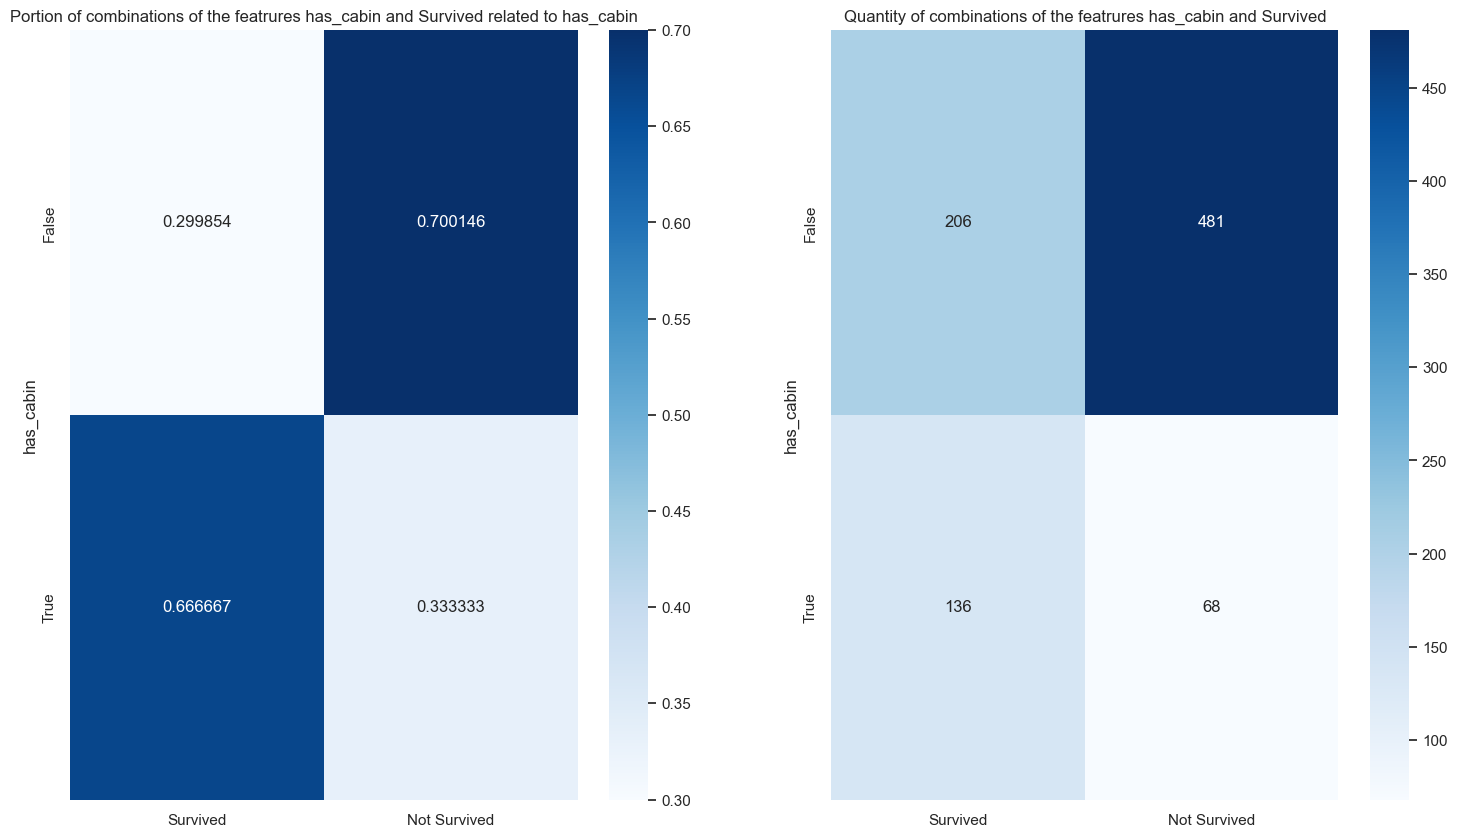

In [170]:
train["has_cabin"] = train.Cabin.notnull() 
train["has_cabin"]
Cat_Heat_Map(train, "has_cabin", "Survived")

### Embarked

Embarked shows the Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
People from Southampton are likely to die while people from Cherbourg have a good chance to survive
Passengers from Cherbourg are likely more wealthy people, maybe more women
Embarked need to be One hot encoded

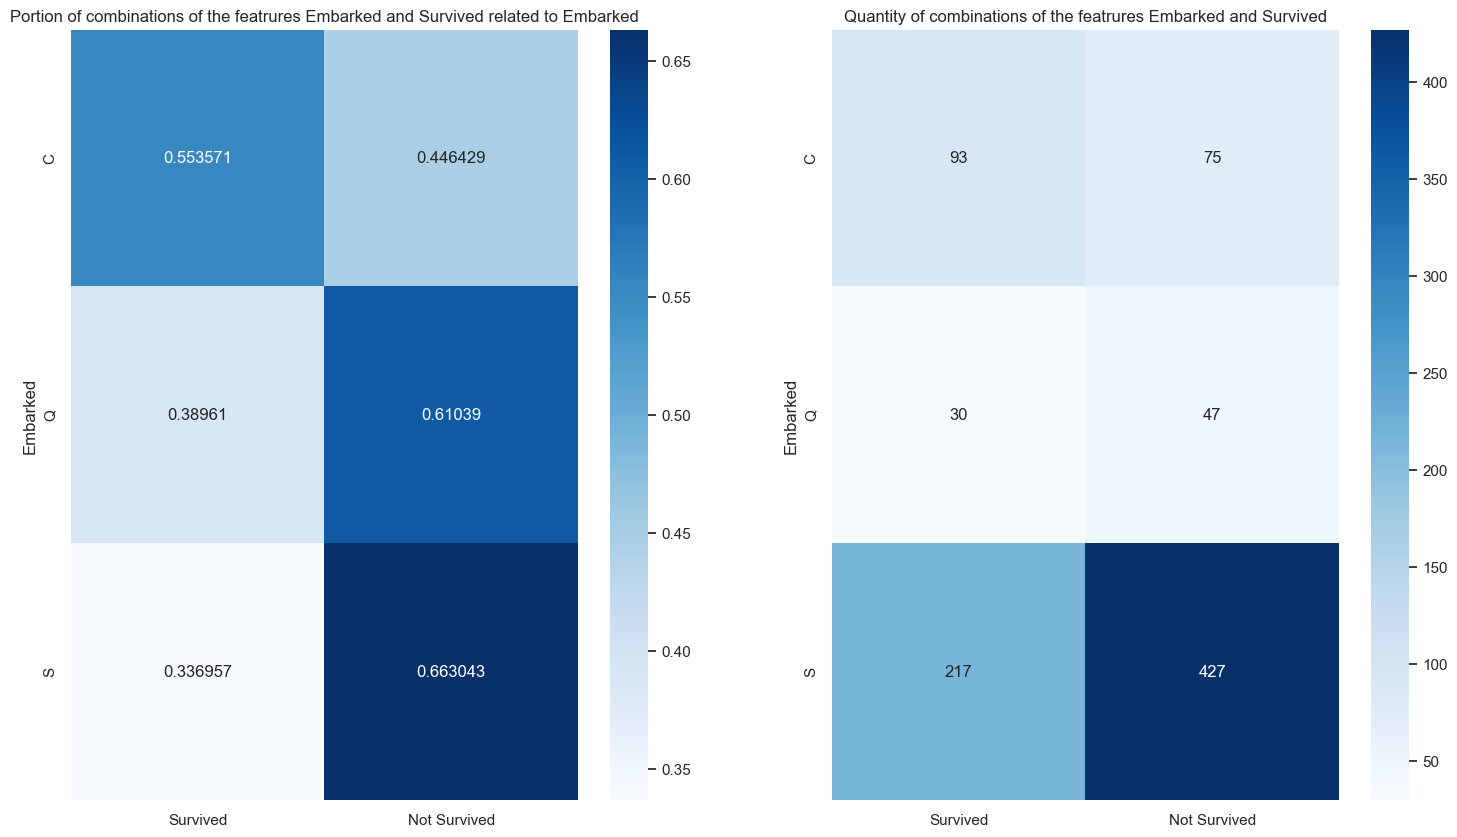

In [171]:
Cat_Heat_Map(train, "Embarked", "Survived")

---

## 3. Feature Engineering

### 

In [172]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,has_cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False


In [173]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

y_train = train["Survived"]
train = train.drop(["Survived", "PassengerId"], axis = 1)
train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,has_cabin
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False


In [174]:
train["Sex"] = train["Sex"].map({"male":0, "female":1})
train["has_cabin"] = train["has_cabin"].map({False:0, True:1})
train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,has_cabin
0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1
4,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0


In [175]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [176]:
encoder = OneHotEncoder()
df = pd.DataFrame(encoder.fit_transform(train[["Embarked"]]).toarray())
train = train.join(df)
train.pop("Embarked")
train.pop(3)
train = train.rename(columns ={0:"C", 1:"Q", 2: "S"})
train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,has_cabin,C,Q,S
0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0.0,0.0,1.0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1.0,0.0,0.0
2,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0.0,0.0,1.0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1,0.0,0.0,1.0
4,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0.0,0.0,1.0


In [177]:
train[['Ticket_Letters','Ticket_Number']] =  train["Ticket"].str.split(" ", n=1, expand=True)
train['Ticket_Number'] = train['Ticket_Number'].fillna(train["Ticket_Letters"])
train["Ticket_Letters"] = train["Ticket_Letters"][train["Ticket_Letters"] != train['Ticket_Number']]

train.pop("Ticket")


0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [178]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [179]:
train.Ticket_Letters = train.Ticket_Letters.fillna(0)
train.Ticket_Letters[train.Ticket_Letters != 0] = 1
train.head()

C:\Users\janni\AppData\Local\Temp\ipykernel_7636\2479532419.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.Ticket_Letters[train.Ticket_Letters != 0] = 1


,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,has_cabin,C,Q,S,Ticket_Letters,Ticket_Number
0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,NaN,0,0.0,0.0,1.0,1,21171
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C85,1,1.0,0.0,0.0,1,17599
2,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,NaN,0,0.0,0.0,1.0,1,3101282
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,C123,1,0.0,0.0,1.0,0,113803
4,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,NaN,0,0.0,0.0,1.0,0,373450


In [180]:
train['Cabin'] = train['Cabin'].fillna("#Missing#")
train['Cabin_letter'] = train['Cabin'].str[:1]
train.head()

dict=train['Cabin_letter'].value_counts().to_dict()
train['Cabin_letter'] = train['Cabin_letter'].map(dict)
train.head()



,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,has_cabin,C,Q,S,Ticket_Letters,Ticket_Number,Cabin_letter
0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,#Missing#,0,0.0,0.0,1.0,1,21171,687
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C85,1,1.0,0.0,0.0,1,17599,59
2,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,#Missing#,0,0.0,0.0,1.0,1,3101282,687
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,C123,1,0.0,0.0,1.0,0,113803,59
4,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,#Missing#,0,0.0,0.0,1.0,0,373450,687


In [181]:

df = pd.DataFrame(encoder.fit_transform(train[["Cabin_letter"]]).toarray())

train = train.join(df)
train.pop(7)
train.pop(8)
train.pop("Cabin_letter")
train.pop("Cabin")
train.pop("Name")
train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,has_cabin,C,Q,S,Ticket_Letters,Ticket_Number,0,1,2,3,4,5,6
0,3,0,22.0,1,0,7.2500,0,0.0,0.0,1.0,1,21171,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,38.0,1,0,71.2833,1,1.0,0.0,0.0,1,17599,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,26.0,0,0,7.9250,0,0.0,0.0,1.0,1,3101282,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,35.0,1,0,53.1000,1,0.0,0.0,1.0,0,113803,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,0,35.0,0,0,8.0500,0,0.0,0.0,1.0,0,373450,0.0,0.0,0.0,0.0,0.0,0.0,0.0


---

## 3. Pipleline


In [182]:
from sklearn.base import BaseEstimator, TransformerMixin

class NameIddropper(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(["PassengerId","Name"], axis = 1)
    
class Cabin(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X["has_cabin"] = X.Cabin.notnull() 
        X['Cabin'] = X['Cabin'].fillna("#Missing#")
        X['Cabin_letter'] = X['Cabin'].str[:1]
        dic=X['Cabin_letter'].value_counts().to_dict()
        X['Cabin_letter'] = X['Cabin_letter'].map(dic)
        X.pop("Cabin")
        return X  

class Ticket(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X[['Ticket_Letters','Ticket_Number']] =  X["Ticket"].str.split(" ", n=1, expand=True)
        X['Ticket_Number'] = X['Ticket_Number'].fillna( X["Ticket_Letters"])
        X["Ticket_Letters"] = X["Ticket_Letters"][X["Ticket_Letters"] != X['Ticket_Number']]
        X.pop("Ticket")
        X.pop("Ticket_Number")
        X.Ticket_Letters = X.Ticket_Letters.fillna(0)
        X.Ticket_Letters[X.Ticket_Letters != 0] = 1
        return X

In [183]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

pre_pipeline =  Pipeline([
        ("dropper", NameIddropper()),
        ("cabin", Cabin()),
        ("ticket", Ticket())
])

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse=False)),
])
 
ord_pipeline = Pipeline([
        ("ordinalcoder", OrdinalEncoder()),

    ])

In [184]:
from sklearn.compose import ColumnTransformer

num_attribs = ["Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Embarked"]
ord_attribs = ["Pclass", "Sex", "has_cabin","Ticket_Letters",  "Cabin_letter"]
all_attribs = list(data_train.columns)
print(all_attribs)

preprocess_pipeline = ColumnTransformer([
#        ("pre", pre_pipeline, all_attribs),
        ("num", num_pipeline, num_attribs),
        ("ord", ord_pipeline, ord_attribs),
        ("cat", cat_pipeline, cat_attribs)

    ])

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'has_cabin']


In [185]:
data_train.pop("Survived")

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [186]:

X = preprocess_pipeline.fit_transform(pre_pipeline.fit_transform(data_train))

pd.DataFrame(df).head()

C:\Users\janni\AppData\Local\Temp\ipykernel_7636\3424596324.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.Ticket_Letters[X.Ticket_Letters != 0] = 1


,0,1,2,3,4,5,6,7,8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [187]:
df = preprocess_pipeline.fit_transform(pre_pipeline.fit_transform(test))

pd.DataFrame(df).head()

C:\Users\janni\AppData\Local\Temp\ipykernel_7636\3424596324.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.Ticket_Letters[X.Ticket_Letters != 0] = 1


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.386231,-0.499470,-0.400248,-0.497413,2.0,1.0,0.0,0.0,7.0,0.0,1.0,0.0
1,1.371370,0.616992,-0.400248,-0.512278,2.0,0.0,0.0,0.0,7.0,0.0,0.0,1.0
2,2.553537,-0.499470,-0.400248,-0.464100,1.0,1.0,0.0,0.0,7.0,0.0,1.0,0.0
3,-0.204852,-0.499470,-0.400248,-0.482475,2.0,1.0,0.0,0.0,7.0,0.0,0.0,1.0
4,-0.598908,0.616992,0.619896,-0.417492,2.0,0.0,0.0,0.0,7.0,0.0,0.0,1.0


In [195]:
from numpy import mean
from numpy import std
import builtins



from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot
#XGBoost
#Adaptive Boosting

def get_models():
    models = builtins.dict()

    # lr
    models["lre"] = LogisticRegression().fit(X, y)
    # perceptron
    models['per'] = Perceptron().fit(X, y)
    # rf
    models['rf'] = RandomForestClassifier().fit(X,y)
    # gbm
    models['gbm'] = GradientBoostingClassifier().fit(X,y)
    # adaboost
    models['ada'] = AdaBoostClassifier().fit(X,y)
    

    return models
    # evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

>lre 0.800 (0.037)
>per 0.761 (0.045)
>rf 0.803 (0.037)
>gbm 0.826 (0.030)
>ada 0.804 (0.043)


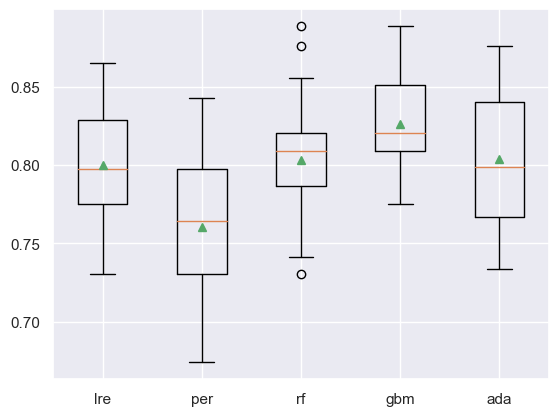

In [196]:

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [205]:
from sklearn.model_selection import GridSearchCV
param_grid = [{
            "max_depth": [1, 2, 3, 4],
            'n_estimators': [1,2,3,4,5],
            "learning_rate": [1.0,0.1]}]

GBC = GradientBoostingClassifier().fit(X,y)
grid_search = GridSearchCV(GBC, param_grid, cv=3,
        scoring='accuracy',
        return_train_score=True)
grid_search.fit(X, y)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid=[{'learning_rate': [1.0, 0.1],
                          'max_depth': [1, 2, 3, 4],
                          'n_estimators': [1, 2, 3, 4, 5]}],
             return_train_score=True, scoring='accuracy')

In [207]:
from sklearn.metrics import accuracy_score
y_pred = grid_search.predict(X)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y,y_pred)))



Accuracy Score : 0.8428731762065096


In [234]:
y_test = grid_search.predict(df)

PassengerId = list(range(892, 1310))

y_test = pd.DataFrame(y_test)

y_test.insert(loc=0, column = "PassengerId", value=PassengerId)
y_test = y_test.rename(columns = {0:"Survived"})
print(y_test)
y_test = y_test.set_index("PassengerId")
print(y_test)
y_test.to_csv("D:\Programming\Python\Kaggle\Titanic\y_predict.csv")

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
             Survived
PassengerId          
892                 0
893                 0
894                 0
895                 0
896                 0
...               ...
1305                0
1306                1
1307                0
1308                0
1309                0

[418 rows x 1 columns]
